# Scene Text Detection and Recognition

## 1. Overview:
Now a days Deep Learning becoming the extremely popular in the area
of Computer vision in this one of the problem statement is scene text
detection and recognition is one.This approach can be used for
detecting number plates from vehicles,natural scene text detection
and recognition etc..


<img src="scene.png" width="800" height="400">

1.Text Detector:Which detects the text from images by drawing the bounding box.
    
2.Text Recognizer:Recognize the text from bounding box by using OCR(Optical Character Recognition) technique.
    
3.Text Language Translation:Recognized text can be translated into any other language.

## 2. Problem Statement:
The main objective of this case study is to detect the text from image and drawing a bounding box to that text and then recognize that text from bounding box we can also convert the text into another language.

## 3.Business Objectives and Constraints:
1.Texts in scene images can be in a different languages, colors, fonts, sizes,shapes.

2.Scenes may have backgrounds with objects and aslo with shape which is extremely similar to any text which create problems while detecting texts.

3.captured scene images are noisy,blurred,rotated.

4.Low latency is required to detect, recognize and translate the text in the images.

## 4.Data:
Download data from this link:https://rrc.cvc.uab.es/?ch=4&com=downloads

1) This dataset is provided by International Conference Document Analysis & Recognition which contains the images in images we have text this text we have to detect and recognize it.

2) The dataset iam using the ICDAR 2015 which consists of 1000 train images and 500 test images which images in this is Text which is a English Language and also has features like blur,small features.It also contains 2,077 cropped text instances, including more than 200 irregular text samples.

3) These images were taken by google glasses without ensuring the image quality,texts is very small,some images are blurred


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import os
import pathlib
import cv2
from PIL import Image
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def creating_dataframe(dir_path,train_test):
    a =[]
    for i in os.listdir(dir_path):
      if i == train_test or i == train_test+'_gt':
        dir_path1 = dir_path+ i
        dir_path2= pathlib.Path(dir_path1)
        dir_path3=dir_path2.glob('*.*')
        dir_path3 = [str(j) for j in dir_path3]
        a.append(dir_path3)
    data_frame=pd.DataFrame(list(zip(a[1],a[0])),columns=['images', 'ground_truth'])
    data_frame['images']=sorted(data_frame['images'])
    data_frame['ground_truth']=sorted(data_frame['ground_truth'])
    return data_frame

In [5]:
train_data = creating_dataframe("/content/drive/MyDrive/ICDAIR2015","train")
train_data.head()

,images,ground_truth
0,/content/drive/MyDrive/ICDAIR2015/train/img_1.jpg,/content/drive/MyDrive/ICDAIR2015/train_gt/gt_...
1,/content/drive/MyDrive/ICDAIR2015/train/img_10...,/content/drive/MyDrive/ICDAIR2015/train_gt/gt_...
2,/content/drive/MyDrive/ICDAIR2015/train/img_10...,/content/drive/MyDrive/ICDAIR2015/train_gt/gt_...
3,/content/drive/MyDrive/ICDAIR2015/train/img_10...,/content/drive/MyDrive/ICDAIR2015/train_gt/gt_...
4,/content/drive/MyDrive/ICDAIR2015/train/img_10...,/content/drive/MyDrive/ICDAIR2015/train_gt/gt_...


In [6]:
print("shape of the dataset:",train_data.shape)
print(train_data['images'][0])
print(train_data['ground_truth'][0])

shape of the dataset: (1000, 2)
/content/drive/MyDrive/ICDAIR2015/train/img_1.jpg
/content/drive/MyDrive/ICDAIR2015/train_gt/gt_img_1.txt


In [8]:
test_data = creating_dataframe("/content/drive/MyDrive/ICDAIR2015","test")
test_data.head()

,images,ground_truth
0,/content/drive/MyDrive/ICDAIR2015/test/img_1.jpg,/content/drive/MyDrive/ICDAIR2015/test_gt/gt_i...
1,/content/drive/MyDrive/ICDAIR2015/test/img_10.jpg,/content/drive/MyDrive/ICDAIR2015/test_gt/gt_i...
2,/content/drive/MyDrive/ICDAIR2015/test/img_100...,/content/drive/MyDrive/ICDAIR2015/test_gt/gt_i...
3,/content/drive/MyDrive/ICDAIR2015/test/img_101...,/content/drive/MyDrive/ICDAIR2015/test_gt/gt_i...
4,/content/drive/MyDrive/ICDAIR2015/test/img_102...,/content/drive/MyDrive/ICDAIR2015/test_gt/gt_i...


In [9]:
print("shape of the dataset:",test_data.shape)
print(test_data['images'][0])
print(test_data['ground_truth'][0])

shape of the dataset: (500, 2)
/content/drive/MyDrive/ICDAIR2015/test/img_1.jpg
/content/drive/MyDrive/ICDAIR2015/test_gt/gt_img_1.txt


In [10]:
im = Image.open('/content/drive/MyDrive/ICDAIR2015/train/img_1.jpg')
width, height = im.size
print("The height of the train images is:",height)
print("The width of the train images is:",width)

The height of the train images is: 720
The width of the train images is: 1280


In [11]:
im = Image.open('/content/drive/MyDrive/ICDAIR2015/test/img_1.jpg')
width, height = im.size
print("The height of the test images is:",height)
print("The width of the test images is:",width)

The height of the test images is: 720
The width of the test images is: 1280


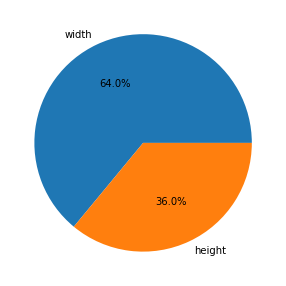

In [12]:
plt.figure(figsize=(12,5))
q=np.array([width,height])
labels='width','height'
plt.pie(q,labels=labels,autopct='%1.1f%%')
plt.show()

## Sample file of ground truth(.txt):
The ground truth which contains the words and coordinates.

790,302,903,304,902,335,790,335,JOINT

822,288,872,286,871,298,823,300,yourself

641,138,657,139,657,151,641,151,###

669,139,693,140,693,154,669,153,154

700,141,723,142,723,155,701,154,197

637,101,721,106,722,115,637,110,###

668,157,693,158,693,170,668,170,727

636,155,661,156,662,169,636,168,198

660,82,700,85,700,99,660,96,20029

925,252,973,254,973,262,925,262,###

789,284,818,284,818,297,789,297,Free

875,286,902,289,903,298,875,298,from

791,337,863,337,863,364,791,364,PAIN

794,445,818,445,818,473,794,473,###

922,440,962,442,963,462,922,463,###

In [13]:
#For train data adding coordinates column and text column from ground truth column which is a text data 
coordinates=[]
text=[]
for i in train_data['ground_truth']:
  a=[]
  #opening the ground_truth data
  df=open(str(i),encoding='utf-8-sig')
  for j in df:
    #splitting the data
    line=j.split(",")
    #append the each and every splitted line from ground_truth data
    a.append(line)
  b=[]
  for k in a:
    #Taking only the last word 
    line=k[-1]
    #Removing \n
    line=re.sub(r"[\n\t\-\\\/]","",line)
    #Converting all words into lower
    line=line.lower()
    #Appending only the words 
    b.append(line)
  c = a
  for l in c:
    #removing words
    l.remove(l[-1])
  coordinates.append(c)
  text.append(b)

In [14]:
train_data['text']=text
train_data['coordinates']=coordinates

In [15]:
train_data.head(2)

,images,ground_truth,text,coordinates
0,/content/drive/MyDrive/ICDAIR2015/train/img_1.jpg,/content/drive/MyDrive/ICDAIR2015/train_gt/gt_...,"[genaxis theatre, [06], ###, 6203, carpark, ##...","[[377, 117, 463, 117, 465, 130, 378, 130], [49..."
1,/content/drive/MyDrive/ICDAIR2015/train/img_10...,/content/drive/MyDrive/ICDAIR2015/train_gt/gt_...,"[###, harbourfront, cc22, bua, ###, ###, ###, ...","[[261, 138, 284, 140, 279, 158, 260, 158], [28..."


In [16]:
#For test data adding coordinates column and text column from ground truth column which is a text data 
coordinates=[]
text=[]
for i in test_data['ground_truth']:
  a=[]
  #opening the ground_truth data
  df=open(str(i),encoding='utf-8-sig')
  for j in df:
    #splitting the data
    line=j.split(",")
    #append the each and every splitted line from ground_truth data
    a.append(line)
  b=[]
  for k in a:
    #Taking only the last word 
    line=k[-1]
    #Removing \n
    line=re.sub(r"[\n\t\-\\\/]","",line)
    #Converting all words into lower
    line=line.lower()
    #Appending only the words 
    b.append(line)
  c = a
  for l in c:
    #Removing words 
    l.remove(l[-1])
  coordinates.append(c)
  text.append(b)

In [17]:
test_data['text']=text
test_data['coordinates']=coordinates

In [18]:
test_data.head(2)

,images,ground_truth,text,coordinates
0,/content/drive/MyDrive/ICDAIR2015/test/img_1.jpg,/content/drive/MyDrive/ICDAIR2015/test_gt/gt_i...,"[###, ###, ###, ###, ###, ###, ###, ###]","[[933, 255, 954, 255, 956, 277, 936, 277], [17..."
1,/content/drive/MyDrive/ICDAIR2015/test/img_10.jpg,/content/drive/MyDrive/ICDAIR2015/test_gt/gt_i...,"[please, lower, your, volume, when, you, pass,...","[[27, 17, 103, 22, 106, 47, 30, 45], [107, 20,..."


In [26]:
#In this function we have to send images path and text column,coordinates
def plotting_bbox(images,text,coordinates):
  text=np.array(text)
  v = []
  for i in coordinates:
    v.append(list(map(int,i)))

  b=np.array(v)
  (a,c) = b.shape
  #coordinates=np.array(coordinates)
  for i in range(a):
    for j in range(c):
      #https://www.geeksforgeeks.org/python-opencv-cv2-polylines-method/
      #Taking the coordinates
      pts=np.array([[b[i,0],b[i,1]],[b[i,2],b[i,3]],[b[i,4],b[i,5]],[b[i,6],b[i,7]]],np.int32)
      #bounding box on the image
      img=cv2.polylines(images,[pts],True,(0,255,255),thickness=3)
      #Taking width and height
      (width,height) = cv2.getTextSize(text[i], cv2.FONT_HERSHEY_PLAIN, 1.5, 1)[0]
      #Set the start position of the text
      x = b[i,0] 
      y = b[i,1] + 2
      coordinates_box = ((x,y), (x + width + 2,y -height - 2))
      #plotting bounding box for the text
      cv2.rectangle(img, coordinates_box[0],coordinates_box[1], (255, 255, 255), cv2.FILLED)
      #Putting text on top of the boundingbox
      cv2.putText(img, text[i], (x,y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 0, 0), 1)
  #Giving title to our bounding box image
  plt.title('image_with_bounding_box')
  #Plotting the boundingbox image
  plt.imshow(img)


In [27]:
def plotting_images(a,train):
  for i in range(a):
    images = train['images'][i]
    text = train['text'][i]
    coordinates = train['coordinates'][i]
    img = cv2.imread(images)
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title('image')
    plt.imshow(img)
    plt.subplot(1,2,2)
    plotting_bbox(img,text,coordinates)

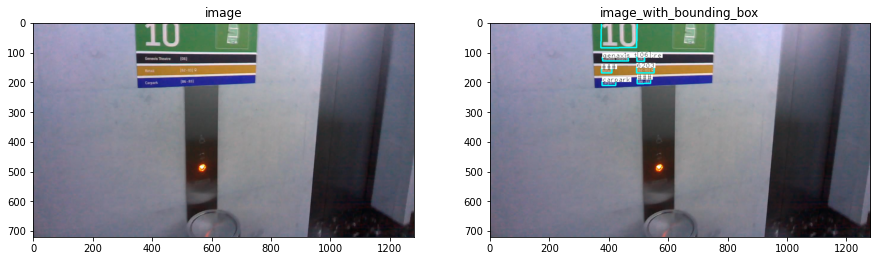

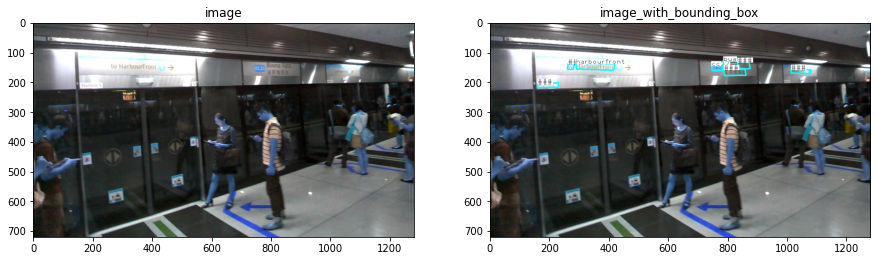

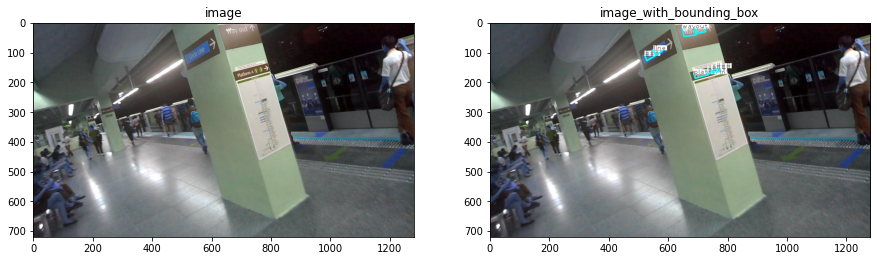

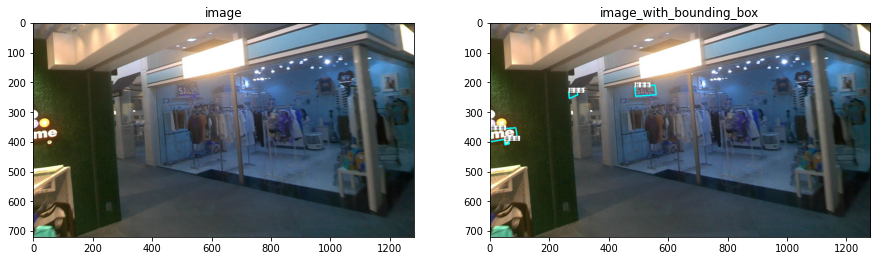

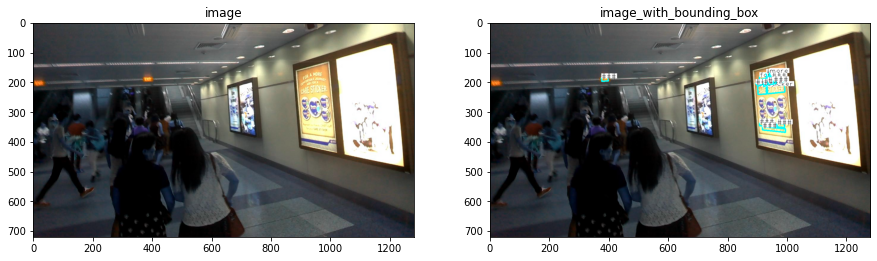

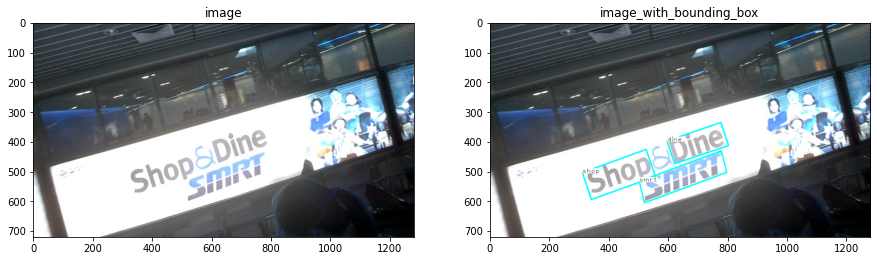

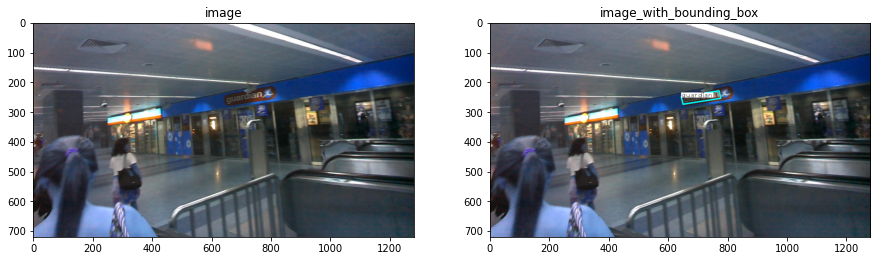

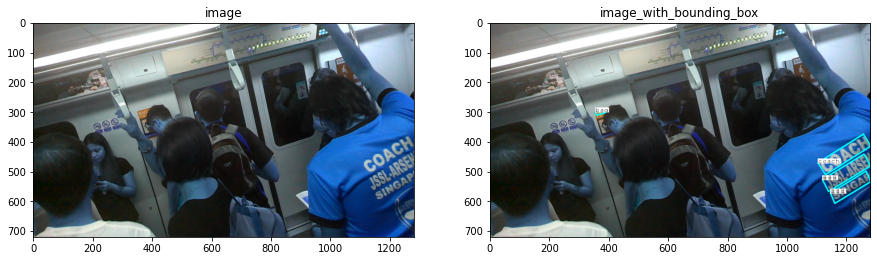

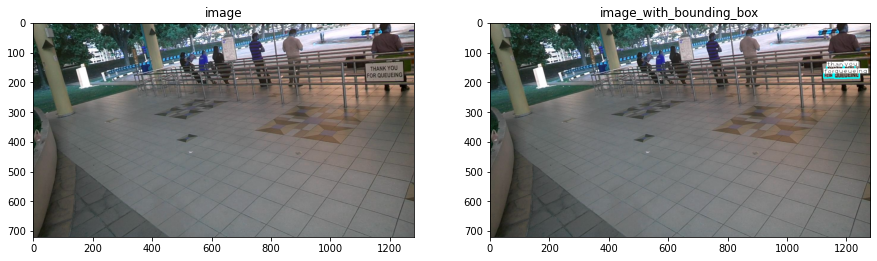

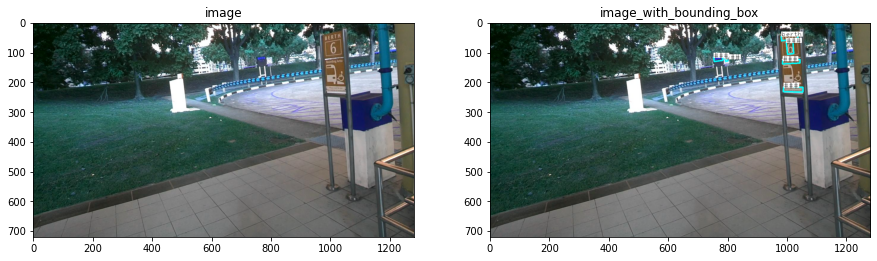

In [28]:
#Plotting 10 train images
plotting_images(10,train_data)

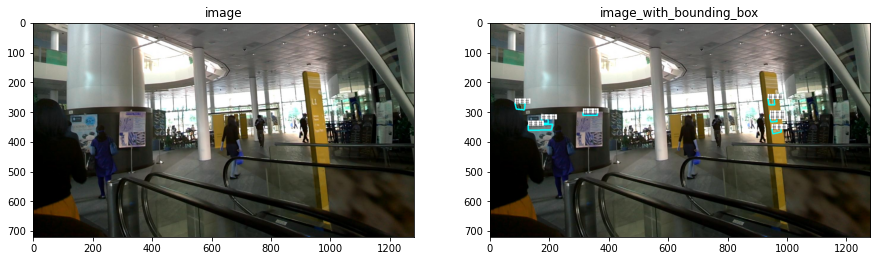

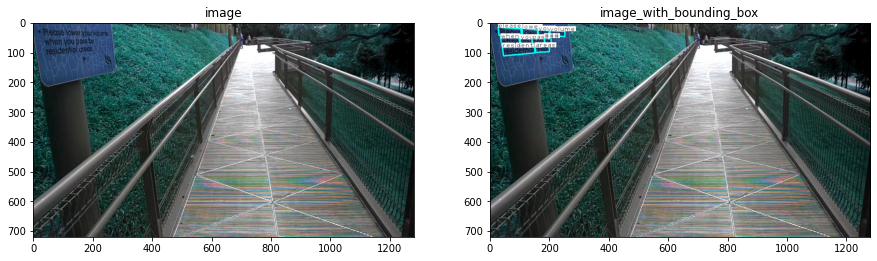

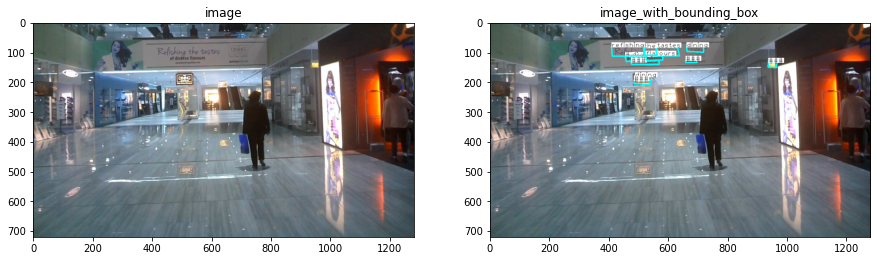

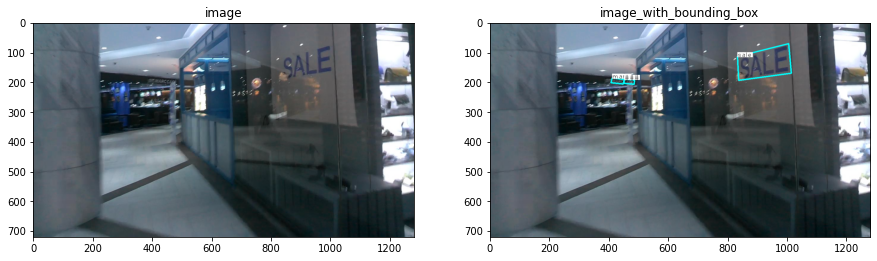

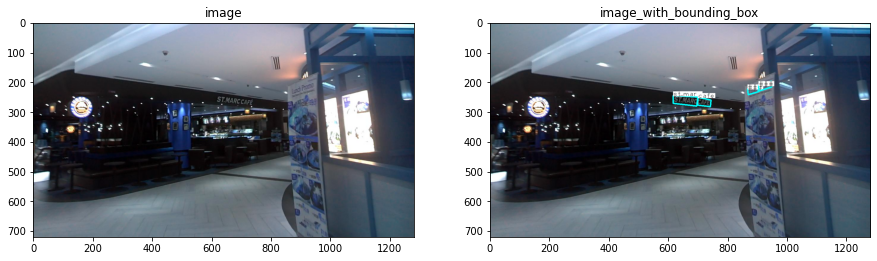

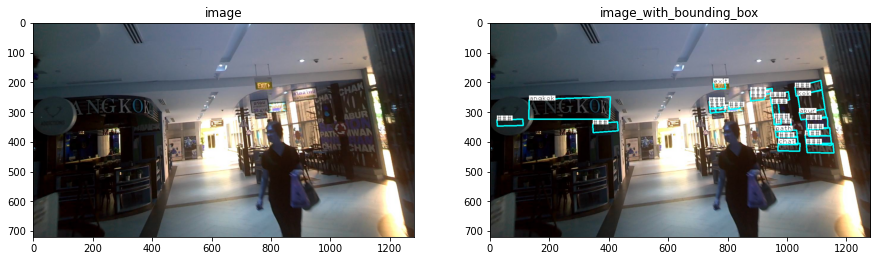

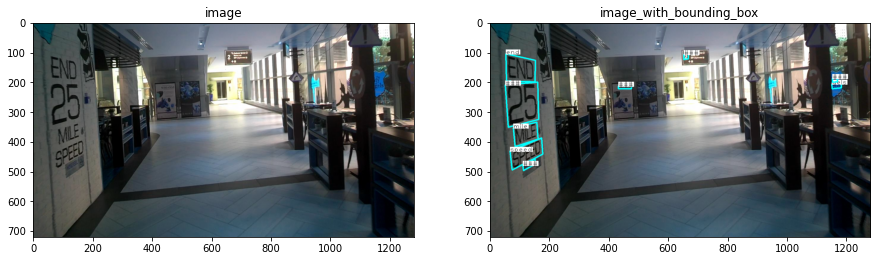

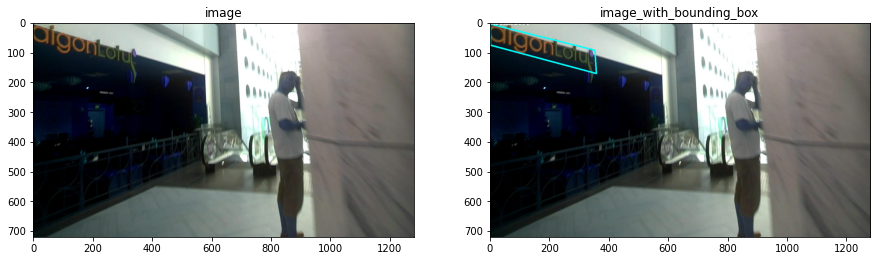

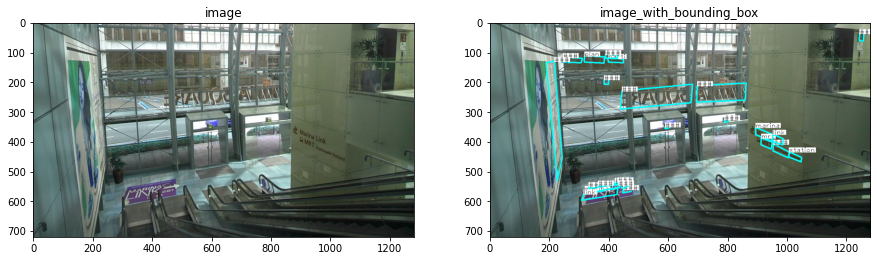

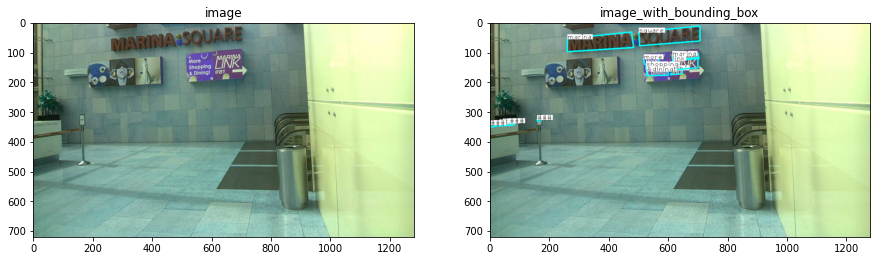

In [29]:
#plotting 10 test images
plotting_images(10,test_data)

# Observations:
    1.We can observe from the above images and some texts are in smaller,also some images are blurred which means not clear.
    2.some texts in images are replaced with "###" which means no text is available in the bounding box.
    3.All images have RGB channels.
    4.Text in all the images are in only one language i.e in English only.

# Conclusion:
    1.In ICDAIR 2015 dataset contains 1500 images 1000 images belongs to train and 500 images belong to test.
    2.Each image height is 720 and width of the image is 1280.
    3.Most of the images the text is smaller and blurred.
    4.All images consists of 3 channels i.e,RGB channels.